# <center><u>Bank Loan Buying Prediction Modeling</u></center>

### Data Description:
The data is about 5000 customer of a bank (Thera Bank) including the customer's demographic information and customer's relationship with bank information. Also the data have the customer response to the last personal loan campaign. 
### File Name: 
Bank_Personal_Loan_Modelling.csv
### Objective:
The bank management wants to explore ways of converting its liability customers to personal loan customers. So our objective is to dive into and analyse the data and predict the likelihood of a liability customer buying the personal loans.
### Analysis By:
Soumalya Biswas (Group-3)

# =============================================================

### Importing the necessary libraries to analyse data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train-Test data spliting library
from sklearn.model_selection import train_test_split
# Logistic Regression library
from sklearn.linear_model import LogisticRegression
# Calculate accuracy measures and confusion matrix
from sklearn import metrics
# Naive Bayes library
from sklearn.naive_bayes import GaussianNB
# KNN Classifier library
from sklearn.neighbors import KNeighborsClassifier
# Preprocessing library
from sklearn import preprocessing

<b>Comment:</b> 
* Importing the pandas library to access the dataframe.
* For graphical representation I used seaborn and matplotlib.
* Numpy library used to calculate and access array
* For spliting data used `train_test_split` function from `model_selection` library of `sklearn`
* For logistic regression using `LogisticRegression` function of `sklearn` `linear_model` library
* Using `metrics` function of `sklearn` for accuracy and confusion matrix measurements
* For Naive-Bayes model using `GaussianNB` function of `sklearn` `naive_bayes` library
* For KNN model using `KNeighborsClassifier` function of `sklearn` `neighbors` library
* For scaling the data using `preprocessing` library of `sklearn`

### Reading the data as a data frame

In [2]:
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<b>Comment:</b> Read the data from Bank_Personal_Loan_Modelling.csv file using pandas function called read_csv and stored the dataframe in variable named bank_df. Also displayed the first 5 row of the data from dataframe using head function.

### Understanding of Data Attributes
  Checked the dataset separately with excel editor. Added filter in each column to understand the nature of the data.
  
<b><u>Nominal Variables :</u></b>
  * <b>ID : </b> This is the column which is just helps to identify the customers. No mising value is there and it should not impact the target column asper it's functionality, also it does not provide any general conclusion for future potential loan customers. I can drop this column after few more steps checking.
  * <b>ZIP Code : </b> ZIP code represents the location of the customer but it will not going to impact too much on the target column as per it's functionality.
  
<b><u>Interval Vriables :</u></b>
  * <b>Age : </b> The Age column represents the customer age. Min value is 23 and max value is 67 here. Is will play an important role in our model.
  * <b>Experience : </b> The Experience column is the work experience of the customer. It has min value in negative and that is quite abnormal. Experience can't be in negative value.
  * <b>Income : </b> The Income values are the customer annual income amount in dollar (X 100USD). It's very important attribute towards getting the loan. 
  * <b>CCAvg : </b> The CCAvg values are the customer monthly credit card spending amount in dollar (x 100USD). It's also very important attribute towards getting the loan. 
  * <b>Mortgage : </b> The Mortgage attributes are the customer's house mortgage amount. I will cehck the impact of Mortgage attribute on personal loan. 
  
<b><u>Ordinal Categorical Variables :</u></b>
  * <b>Family : </b> This is size of the customer's family. It shows how much dependencies lie on customer in terms of re-payment of loan.  
  * <b>Education : </b> This is the education leveb of the customer. It has 3 levels. 1: Undergrad; 2: Graduate; 3: Advanced/Professional. It will surely impact and influence the target variable.  
  
<b><u>Binary Categorical Variables :</u></b>
  * <b>Personal Loan : </b> That's the value where it's showing whether customer accepted the loan or not. <b>This is the Target Value</b>
  * <b>Securities Account : </b> Does the customer have a securities account with the bank? I'll evaluate the impact on target column.
  * <b>CD Account : </b> Does the customer have a certificate of deposit (CD) account with the bank? I'll evaluate the impact on target column.
  * <b>Online : </b> Does the customer use internet banking facilities? I'll evaluate the impact on target column.
  * <b>CreditCard : </b> Does the customer use a credit card issued by UniversalBank? I'll evaluate the impact on target column.

### Saving target variable to the end of the table columns

In [3]:
bank_df['personal_loan_target_col'] = bank_df['Personal Loan']
bank_df.drop('Personal Loan', axis=1, inplace=True)

In [4]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,personal_loan_target_col
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


<b>Comment:</b> Created a new column named `personal_loan_target_col` and saved the `Personal Loan` data in that. Then dropped the `Personal Loan` data column. Basically I kept the target attribute at the one side of the table for better analysis of independent attributes with dependent attribute. And here my target attribute is `Personal Loan` so I replicated that to the end of the table column.

### Performing the basic EDA

* <b><u>Shape of the data</u></b>

In [5]:
rows, columns = bank_df.shape
print(f'There are {rows} rows and {columns} columns in the dataframe.')

There are 5000 rows and 14 columns in the dataframe.


* <b><u>Checking the length of the index of the data</u></b>

In [6]:
len(bank_df.index)

5000

<b>Comment:</b> Found the row size and the index sizes are equal which is 5000 in the dataset against the columns size 14.

* <b><u>Checking the data type of each attribute</u></b>

In [7]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                          5000 non-null int64
Age                         5000 non-null int64
Experience                  5000 non-null int64
Income                      5000 non-null int64
ZIP Code                    5000 non-null int64
Family                      5000 non-null int64
CCAvg                       5000 non-null float64
Education                   5000 non-null int64
Mortgage                    5000 non-null int64
Securities Account          5000 non-null int64
CD Account                  5000 non-null int64
Online                      5000 non-null int64
CreditCard                  5000 non-null int64
personal_loan_target_col    5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
bank_df.dtypes

ID                            int64
Age                           int64
Experience                    int64
Income                        int64
ZIP Code                      int64
Family                        int64
CCAvg                       float64
Education                     int64
Mortgage                      int64
Securities Account            int64
CD Account                    int64
Online                        int64
CreditCard                    int64
personal_loan_target_col      int64
dtype: object

<b>Comment: </b> I can see out of 14 column there is 13 integer (discrete variable) values column and 1 float (Continuous Variable) value column available.
 * 13 Integer type (ID, Age, Experience, Income, ZIP Code, Family, Education, Mortgage, Securities Account, CD Account, Online, CreditCard, personal_loan_target_col)
 * 1 Float type (CCAvg) 

One fact I can notice that `ZIP Code` which is representing the location of the customer. And Multiple customers can belong from a same location. So currently this fields is int64 but that fields can be a categorical fields. Before changing anything let's explore bit more on the data set first.   

* <b><u>Checking the unique value</u></b>

In [9]:
bank_df.apply(lambda x: len(x.unique()))

ID                          5000
Age                           45
Experience                    47
Income                       162
ZIP Code                     467
Family                         4
CCAvg                        108
Education                      3
Mortgage                     347
Securities Account             2
CD Account                     2
Online                         2
CreditCard                     2
personal_loan_target_col       2
dtype: int64

<b>Comment : </b> For checking the unique value I used unique function of pandas and applied through the dataframe with the helpof lambda function.

 * `ID` column straightly represent the row count. Also `Securities Account` , `CD Account` , `Online` , `CreditCard` , `personal_loan_target_col` are having 2 unique values which is 0 and 1. 
 * `Family` and `Education` are having multiple categorical values.
 * Rest of the attributes are having sets of numbers.

* <b><u>Checking the presence of missing values</u></b>

In [10]:
bank_df.isnull().values.any()

False

In [11]:
bank_df.isna().values.any()

False

In [12]:
bank_df.isnull().sum()

ID                          0
Age                         0
Experience                  0
Income                      0
ZIP Code                    0
Family                      0
CCAvg                       0
Education                   0
Mortgage                    0
Securities Account          0
CD Account                  0
Online                      0
CreditCard                  0
personal_loan_target_col    0
dtype: int64

In [13]:
bank_df.isna().sum()

ID                          0
Age                         0
Experience                  0
Income                      0
ZIP Code                    0
Family                      0
CCAvg                       0
Education                   0
Mortgage                    0
Securities Account          0
CD Account                  0
Online                      0
CreditCard                  0
personal_loan_target_col    0
dtype: int64

<b>Comment:</b> I found there is no missing values in the dataframe. For that I used isnull and isna function of dataframe and there I checked if any isnull or isna values present or not. I found False return. And also checked the sum of null and sum of na values on each attribute which is 0 in our dataset.

Also for more evidence, if I look at the above info function output it's showing me all equal distribution of rows in between different data types. So, I can say there is no missing values in this dataset.

* <b><u>Key Characteristics of Numerical data</u></b>

In [14]:
five_points_summury = bank_df.describe().T
five_points_summury

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


* Mean and the median is same for the age, experience, Family, CCAvg, Education, Online, so we can say it is approximately normally distributed.
* Income, Mortgage are having much values at the max portion, I can say it is skewed towards right side.

* <b><u>5 point summary of numerical attributes</u></b>

In [15]:
five_points_summury[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
ID,1.0,1250.75,2500.5,3750.25,5000.0
Age,23.0,35.00,45.0,55.00,67.0
Experience,-3.0,10.00,20.0,30.00,43.0
Income,8.0,39.00,64.0,98.00,224.0
ZIP Code,9307.0,91911.00,93437.0,94608.00,96651.0
Family,1.0,1.00,2.0,3.00,4.0
CCAvg,0.0,0.70,1.5,2.50,10.0
Education,1.0,1.00,2.0,3.00,3.0
Mortgage,0.0,0.00,0.0,101.00,635.0
Securities Account,0.0,0.00,0.0,0.00,1.0


<b>Comment:</b> I used describe function of dataframe to determine the 5 point summary of numerical attributes. Applied transpose to the result and stored in a variable called five_points_summury.

Here We I can see the key characteristics of our numerical datas like mean, standard deviation  of attributes. 

Then I displayed the 5 point summury where some important insights I found like min and max values of numerical attributes which will help me in my next analysis.


<b>Important : </b> One very important thing to point out is the Experience coulumn values which is having negative range of values. And we know the experience cannot be in negetive. We are going to find some solution in next few steps. 

### Data Cleaning

In [16]:
negExpCount = bank_df[bank_df['Experience'] < 0]['Experience'].count()
print(f'Experience column is having {negExpCount} negative values')

Experience column is having 52 negative values


In [17]:
posExp_data = bank_df[bank_df['Experience'] > 0]
negExp_data = bank_df[bank_df['Experience'] < 0]
negExp_list = bank_df[bank_df['Experience'] < 0]['ID'].tolist()
for cid in negExp_list:
    age_values = bank_df.loc[np.where(bank_df['ID']==cid)]["Age"].tolist()[0]
    education_values = bank_df.loc[np.where(bank_df['ID']==cid)]["Education"].tolist()[0]    
    posExp_filtered = posExp_data[(posExp_data['Age'] == age_values) & (posExp_data['Education'] == education_values)]
    if posExp_filtered.empty :
        negExp_filtered = negExp_data[(negExp_data['Age'] == age_values) & (negExp_data['Education'] == education_values)]
        expMedianFromPosExp = round(negExp_filtered['Experience'].median())
    else:
        expMedianFromPosExp = round(posExp_filtered['Experience'].median())
    bank_df.loc[bank_df.loc[np.where(bank_df['ID']==cid)].index, 'Experience'] = abs(expMedianFromPosExp)

<b>Comment : </b> Above code use for replacing negative experience values with median values of same age and education lavel customers.
Basically I created two list of customers with positive experience and negative experience. Then filtered the age and education of the negetive experience customers and get the median value of postive experience customers having the same age and education. Atlast replacing the value in coresponding negative experience field. Lets check if the value changed or not.

In [18]:
bank_df['Experience'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Experience,5000.0,20.1348,11.414863,0.0,10.0,20.0,30.0,43.0


<b>Comment: </b> Yes, I can see the `min` value has been changed of `Experience` column. 

### Relation between Individual attributes

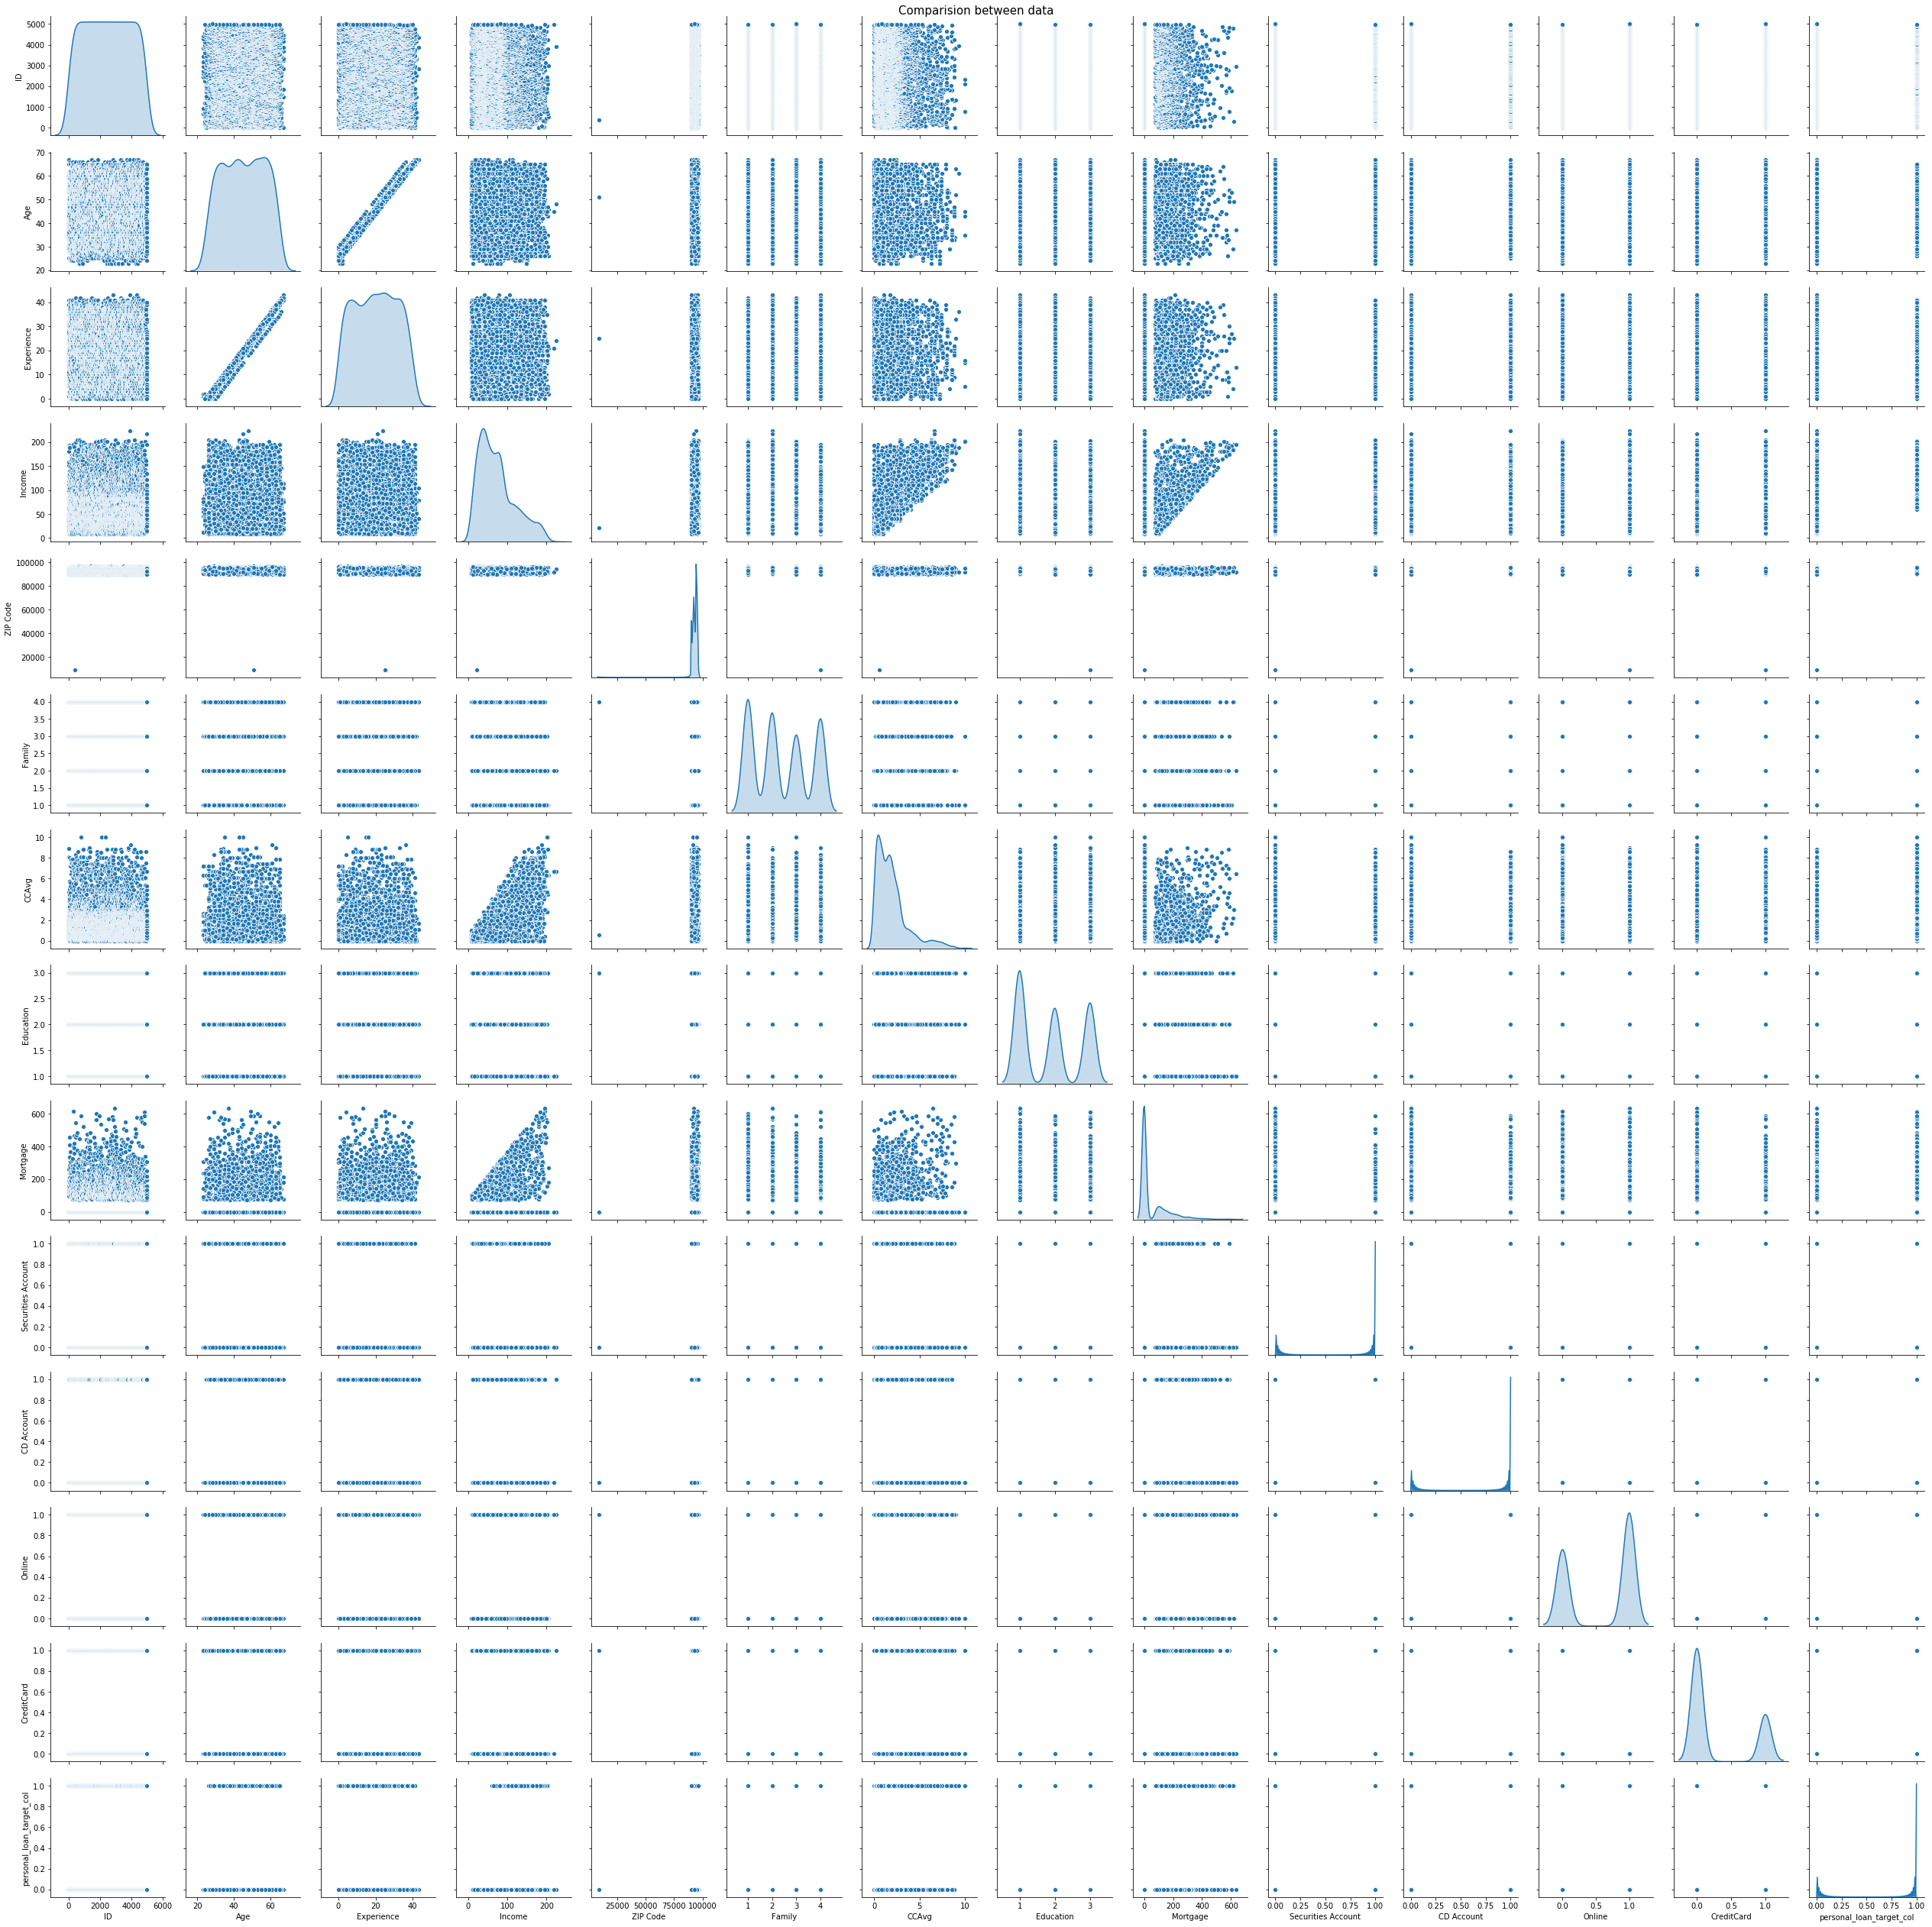

In [19]:
sns.pairplot(bank_df, diag_kind='kde')
plt.suptitle('Comparision between data', y=1,size=15)
plt.show()

<b> Comment: </b> I used seaborn pairplot function to check the relation between individual attributes.

<b> Few interesting facts: </b>
* Age attribute is almost normally distributed and maximum customers falling between 30-60 years of age. Already seen that in the 5 point summary above, where it shows mean is almost equal to median.
* Experence column is also symetric. Here we have some values in negative. We can replace those with median as mean and median are almost same here. It's better to replace those values to get approprieate results
* Income, CCAvg, Mortgage are having right skewness. I can clearly say the mean is higher than the median here.
* In general when Income is high, house Mortgage is also High.

### Distribution of attributes:

* I'm using seaborn library distplot() function to displaying the distribution graph.

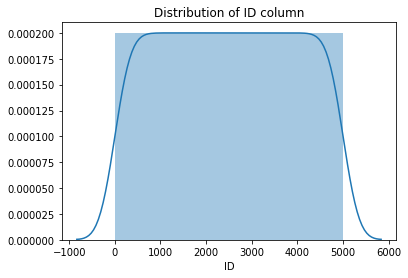

In [20]:
# ID Column distribution

sns.distplot(bank_df['ID'])
plt.title('Distribution of ID column')
plt.show()

<b>Comment:</b> As I can see, the ID column distribution is completely uniform/flat. Also I observed the ID column data from the csv and that is absolutely not impacting the target column. Hence we can remove this column from the dependent variables.

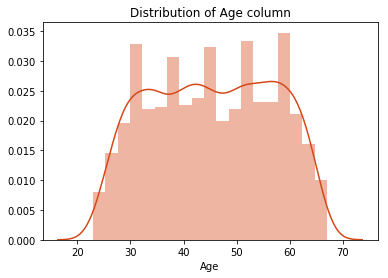

In [21]:
# Age Column distribution

sns.distplot(bank_df['Age'],color='#d64718')
plt.title('Distribution of Age column')
plt.show()

<b>Comment:</b> Here in the above graph I represented the distribution of Age column through out the dataset. I used seaborn displot function for this. I found the Age data is non Symmetric. I can see it has 3 pick point near about.
    
   But maximum data lies in between 30-60 years of age.

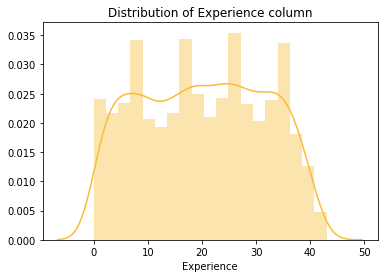

In [22]:
# Experience Column distribution

sns.distplot(bank_df['Experience'], color="#f7bd36")
plt.title('Distribution of Experience column')
plt.show()

<b>Comment:</b> Here in the above graph I represented the distribution of Experience column through out the dataset.I found the Experience data is also non Symmetric. I can see it has 3 pick point near about.
    
   Maximum data lies in between 10-35 years of experience. Also I can say that Age and Experience attribute will have some sort of good correlation.

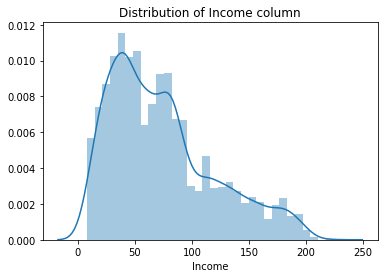

In [23]:
# Income Column distribution

sns.distplot(bank_df['Income'])
plt.title('Distribution of Income column')
plt.show()

<b>Comment:</b> Here in the above graph I represented the distribution of Income column through out the dataset.I found the Income data is skewed to the right and having two picks also.

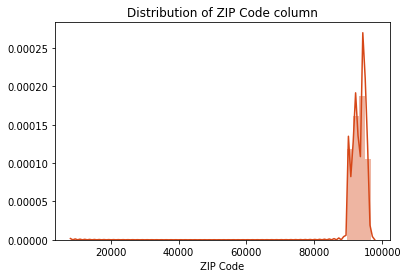

In [24]:
# ZIP Code Column distribution

sns.distplot(bank_df['ZIP Code'],color='#d64718')
plt.title('Distribution of ZIP Code column')
plt.show()

<b> Comment: </b> The Zip code fields data is having left skewed distributed but it doesn't really impact the target column.

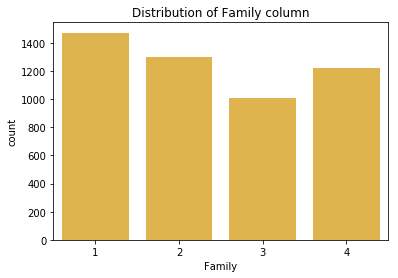

In [25]:
# Family Column distribution

sns.countplot(bank_df['Family'], color="#f7bd36")
plt.title('Distribution of Family column')
plt.show()

<b> Comment: </b> Family column is normally distributed among it's multiple value. Family of 1 person has the majority.

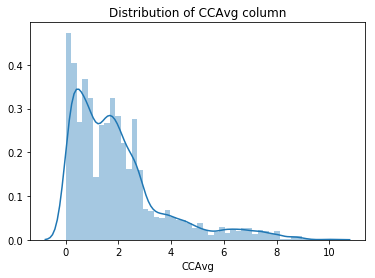

In [26]:
# CCAvg Column distribution

sns.distplot(bank_df['CCAvg'])
plt.title('Distribution of CCAvg column')
plt.show()

<b> Comment: </b> Average Credit Card spending has two picks and data is right side skewed.

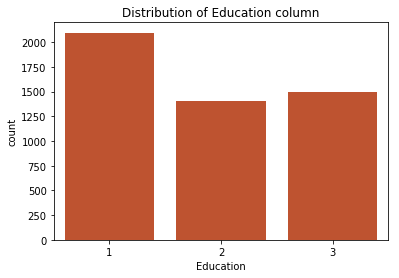

In [27]:
# Education Column distribution

sns.countplot(bank_df['Education'],color='#d64718')
plt.title('Distribution of Education column')
plt.show()

<b> Comment: </b> Education column is normally distributed among it's multiple value. It's the `Undergrad` which has the majority.

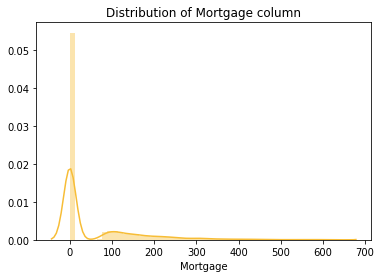

In [28]:
# Mortgage Column distribution

sns.distplot(bank_df['Mortgage'], color="#f7bd36")
plt.title('Distribution of Mortgage column')
plt.show()

<b> Comment: </b> Mortgage is having long tail to the right side and it has outlier also.

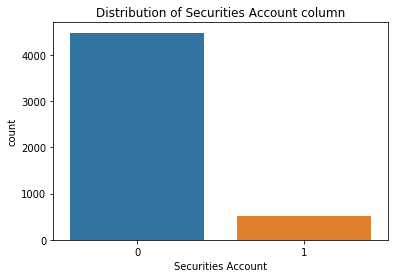

In [29]:
# Securities Account Column distribution

sns.countplot(bank_df['Securities Account'])
plt.title('Distribution of Securities Account column')
plt.show()

<b> Comment: </b> Majority of the customers with No `Security Account` is more.

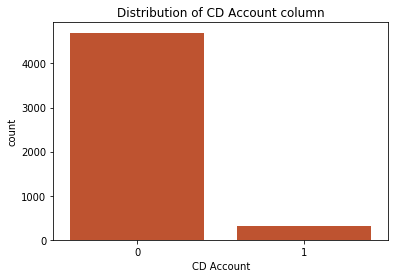

In [30]:
# CD Account Column distribution

sns.countplot(bank_df['CD Account'],color='#d64718')
plt.title('Distribution of CD Account column')
plt.show()

<b> Comment: </b> Majority of the customers with No `CD Account` is more.

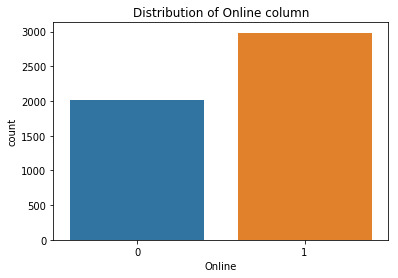

In [31]:
# Online Column distribution

sns.countplot(bank_df['Online'])
plt.title('Distribution of Online column')
plt.show()

<b> Comment: </b> Majority of the customers with `Online` option is more.

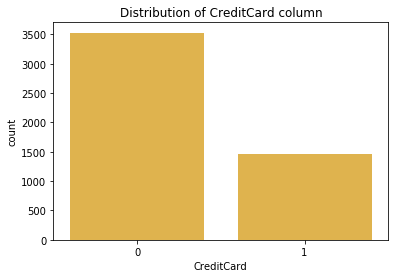

In [32]:
# CreditCard Column distribution

sns.countplot(bank_df['CreditCard'], color="#f7bd36")
plt.title('Distribution of CreditCard column')
plt.show()

<b> Comment: </b> Majority of the customers with No `Credit Card` is more.

#### Personal Loan (Target Column)

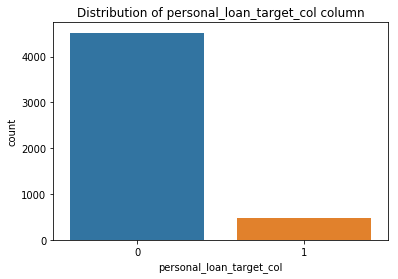

In [33]:
# personal_loan_target_col Column distribution

sns.countplot(bank_df['personal_loan_target_col'])
plt.title('Distribution of personal_loan_target_col column')
plt.show()

<b> Comment: </b> I can clearly see that our target variable is having values with 1 and 0 which representing the loan accepted and rejected by the customer. And amount of rejection is more than the amount of acceptance.

In [34]:
loan_counts = pd.DataFrame({'Labels': bank_df["personal_loan_target_col"].unique(), 'personal_loan_target_col': bank_df["personal_loan_target_col"].value_counts(),'Percentage (%)': bank_df["personal_loan_target_col"].value_counts(normalize=True).mul(100)})
loan_counts

,Labels,personal_loan_target_col,Percentage (%)
0,0,4520,90.4
1,1,480,9.6


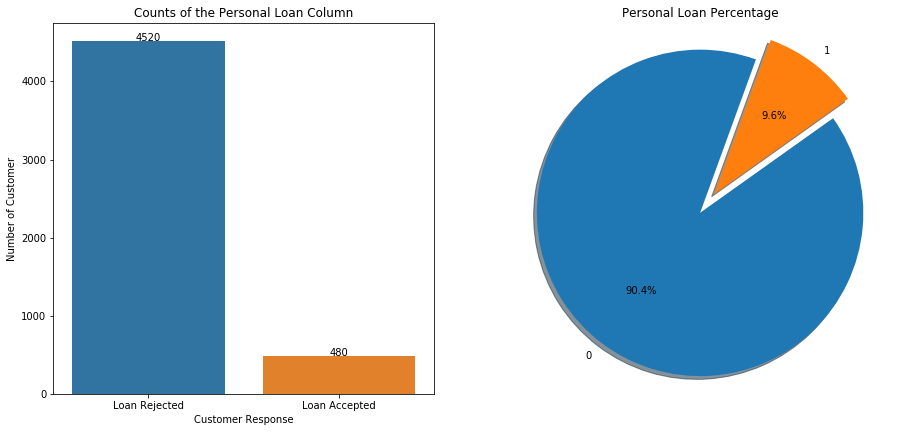

In [35]:
fig1 = plt.figure(figsize=(15,15))
fig1.add_subplot(2,2,1)
ax = sns.countplot(x="personal_loan_target_col", data=bank_df)
plt.title('Counts of the Personal Loan Column')
plt.xlabel('Customer Response')
plt.ylabel('Number of Customer')
ax.set_xticklabels(["Loan Rejected","Loan Accepted"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.3,height ,ha="center")

fig1.add_subplot(2,2,2)
explode = (0, 0.15)
plt.pie(loan_counts["personal_loan_target_col"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
plt.axis('equal')
plt.title("Personal Loan Percentage")
plt.show()

From the above graphs, clearly I can see the no. of customers who accepted and rejected the loan which is 480 and 4520 respectively. I used seaborn countplot function to display that.

### Outlier Checking

Used seaborn boxplot function to observe and display the outliers

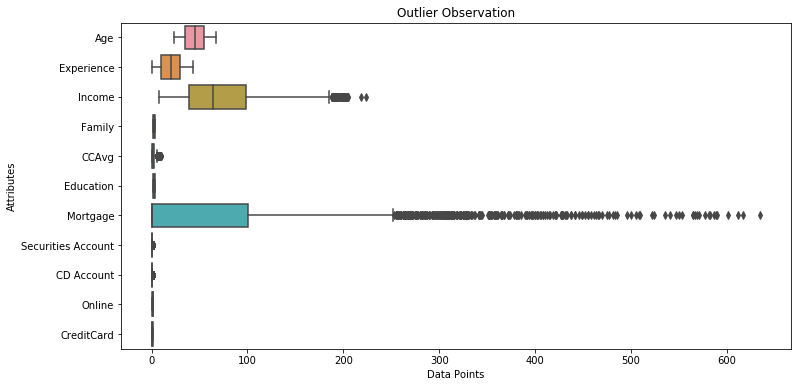

In [36]:
# Leaving ID and ZIP Code column from the graph ploting as 
# those are having less impact on the target column. 

plt.figure(figsize=(12,6))
sns.boxplot(data=bank_df[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']], orient='h')
plt.title('Outlier Observation')
plt.xlabel('Data Points')
plt.ylabel('Attributes')
plt.show()

<b>Comment: </b> From the above ploting I can say `Mortgage` and `Income` column are having clear outliers. But few columns like `CCAvg`, `Securities Account`, `CD Account` are not clearly display whether those are having the outliers or not. Let see those separately.

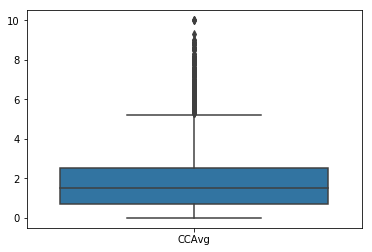

In [37]:
# Boxplot implementation for `CCAvg`
sns.boxplot(data=bank_df[['CCAvg']])
plt.show()

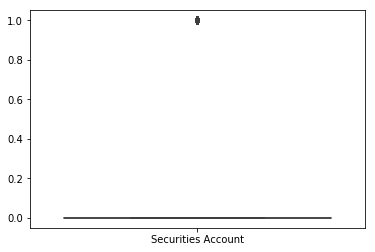

In [38]:
# Boxplot implementation for `Securities Account`
sns.boxplot(data=bank_df[['Securities Account']])
plt.show()

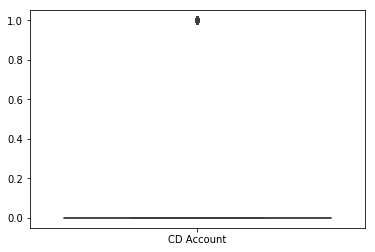

In [39]:
# Boxplot implementation for `CD Account`
sns.boxplot(data=bank_df[['CD Account']])
plt.show()

<b>Comment: </b>  Above three graph is the representation of `CCAvg`, `Securities Account`, `CD Account` column boxplot graph respectively. All of them are having clear outliers. `Securities Account`, `CD Account`  column does have only 0, 1 values but still it has the outliers.

<u>From above individual box plot graph,</u><br>
 a. Bottom black horizontal line of box plot is minimum value.<br>
 b. First black horizontal line of rectangle shape of box plot is First quartile or 25%<br>
 c. Second black horizontal line of rectangle shape of box plot is Second quartile or 50% or median.<br>
 d. Third black horizontal line of rectangle shape of box plot is third quartile or 75%<br>
 e. Top black horizontal line of rectangle shape of box plot is maximum value.<br>
 f. Small diamond shape of box plot is <b>outlier data</b>.

### Comparing other attributes against target column  to check the influence

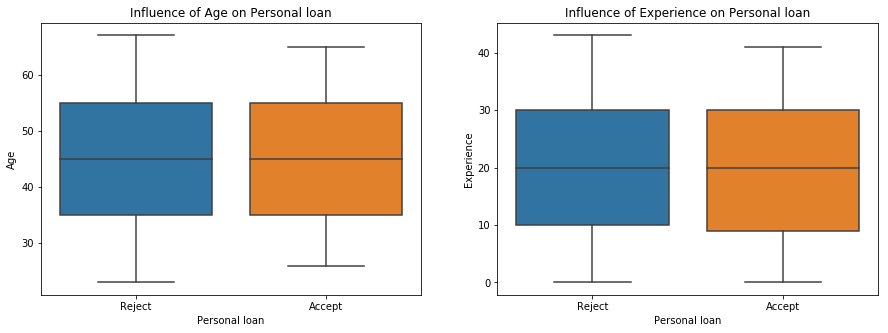

In [40]:
fig1 = plt.figure(figsize=(15,5))
fig1.add_subplot(1,2,1)
compFig1 = sns.boxplot(x='personal_loan_target_col',y='Age',data=bank_df)
plt.title('Influence of Age on Personal loan')
plt.xlabel('Personal loan')
compFig1.set_xticklabels(["Reject","Accept"])
fig1.add_subplot(1,2,2)
compFig2 = sns.boxplot(x='personal_loan_target_col',y='Experience',data=bank_df)
plt.title('Influence of Experience on Personal loan')
plt.xlabel('Personal loan')
compFig2.set_xticklabels(["Reject","Accept"])
plt.show()

<b> Comment: </b> The above two graph represents the influence of `Age` and `Experience` column over Personal loan acceptance and rejection.

* I found there is almost null influence of taking loan and not taking loan w.r.t customers's age and experience.

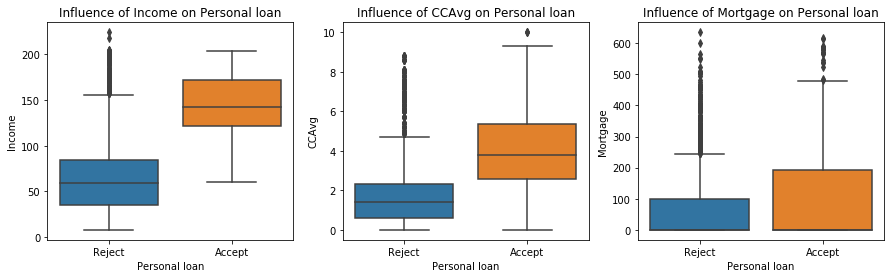

In [41]:
fig1 = plt.figure(figsize=(15,4))
fig1.add_subplot(1,3,1)
compFig1 = sns.boxplot(x='personal_loan_target_col',y='Income',data=bank_df)
plt.title('Influence of Income on Personal loan')
plt.xlabel('Personal loan')
compFig1.set_xticklabels(["Reject","Accept"])
fig1.add_subplot(1,3,2)
compFig2 = sns.boxplot(x='personal_loan_target_col',y='CCAvg',data=bank_df)
plt.title('Influence of CCAvg on Personal loan')
plt.xlabel('Personal loan')
compFig2.set_xticklabels(["Reject","Accept"])
fig1.add_subplot(1,3,3)
compFig3 = sns.boxplot(x='personal_loan_target_col',y='Mortgage',data=bank_df)
plt.title('Influence of Mortgage on Personal loan')
plt.xlabel('Personal loan')
compFig3.set_xticklabels(["Reject","Accept"])
plt.show()

<b> Comment: </b> The above graphs represents the influence of `Income`, `CCAvg` and `Mortgage` column over Personal loan acceptance and rejection.

* Customers with higher income, increases the loan grabing nature.  
* Customers who used to spend more in credit cards are the loan takers.
* Customers with high house mortgage grabing the loan more.

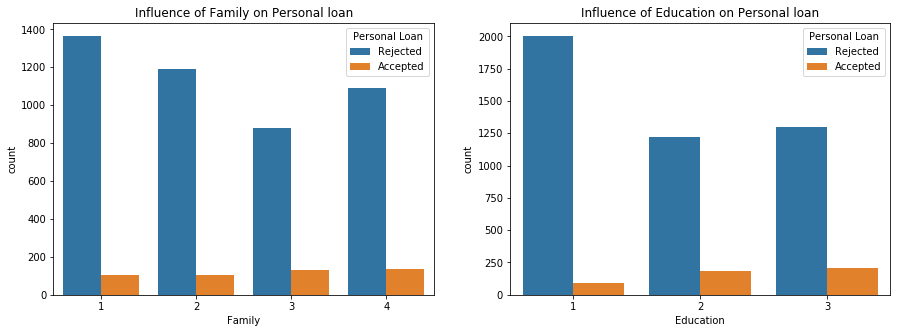

In [42]:
fig1 = plt.figure(figsize=(15,5))
fig1.add_subplot(1,2,1)
compPlot1 = sns.countplot(hue='personal_loan_target_col',x='Family',data=bank_df)
leg = compPlot1.axes.get_legend()
leg.set_title('Personal Loan')
new_labels = ['Rejected', 'Accepted']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.title('Influence of Family on Personal loan')
fig1.add_subplot(1,2,2)
compPlot2 =sns.countplot(hue='personal_loan_target_col',x='Education',data=bank_df)
leg = compPlot2.axes.get_legend()
leg.set_title('Personal Loan')
new_labels = ['Rejected', 'Accepted']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.title('Influence of Education on Personal loan')
plt.show()

<b> Comment: </b> The above graphs represents the influence of `Family` and `Education` column over Personal loan acceptance and rejection.

* All over count of Rejecting a loan offer is more around `Family` and `Education` column.  
* Customers who have family of one person used to reject loan more than other category.
* Customers who have Education level Undergraduate used to reject loan more than other category.
* Customers who have Education level Post Graduate used to accept loan more among others.

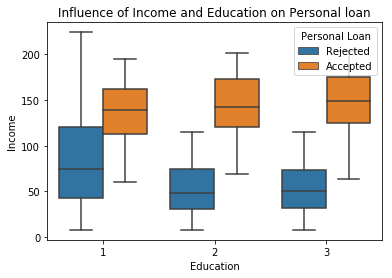

In [43]:
compPlot = sns.boxplot(x='Education',y='Income',hue='personal_loan_target_col',data=bank_df)
leg = compPlot.axes.get_legend()
leg.set_title('Personal Loan')
new_labels = ['Rejected', 'Accepted']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.title('Influence of Income and Education on Personal loan')
plt.show()

<b> Comment: </b> Here is a graph representing the influence of Personal Loan on `Education` and `Income` basis.

* People with higher education have the higher income and belonging from Loan taker category too.

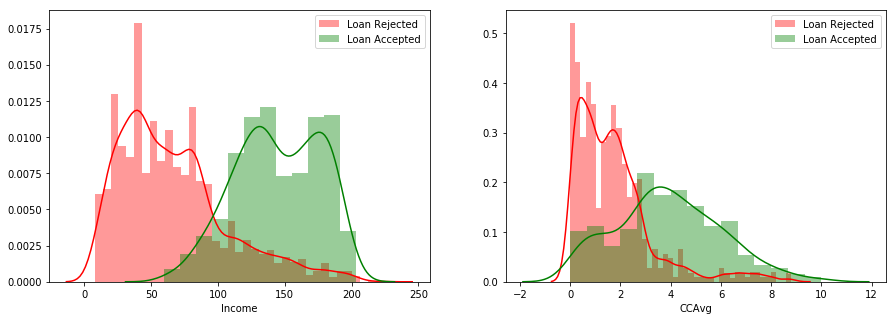

In [44]:
fig1 = plt.figure(figsize=(15,5))
fig1.add_subplot(1,2,1)
sns.distplot( bank_df[bank_df.personal_loan_target_col == 0]['Income'], color = 'r')
sns.distplot( bank_df[bank_df.personal_loan_target_col == 1]['Income'], color = 'g')
plt.gca().legend(('Loan Rejected','Loan Accepted'))
fig1.add_subplot(1,2,2)
sns.distplot( bank_df[bank_df.personal_loan_target_col == 0]['CCAvg'], color = 'r')
sns.distplot( bank_df[bank_df.personal_loan_target_col == 1]['CCAvg'], color = 'g')
plt.gca().legend(('Loan Rejected','Loan Accepted'))
plt.show()

<b> Comment: </b> Above each graph is showing the effect on Personal loan based on `Income` and `CCAvg`.

* Bars with red color showing the rejectors of the loan and bar with green color showing the acceptors of the loan.
* First graph tells, more income more chances to accepting loan offers.
* Second graph tells, Credit Card amount spending between 0-3000USD is rejector of loan offer. But 3000USD - 6000USD spenders on the credit card is the more loan acceptors.

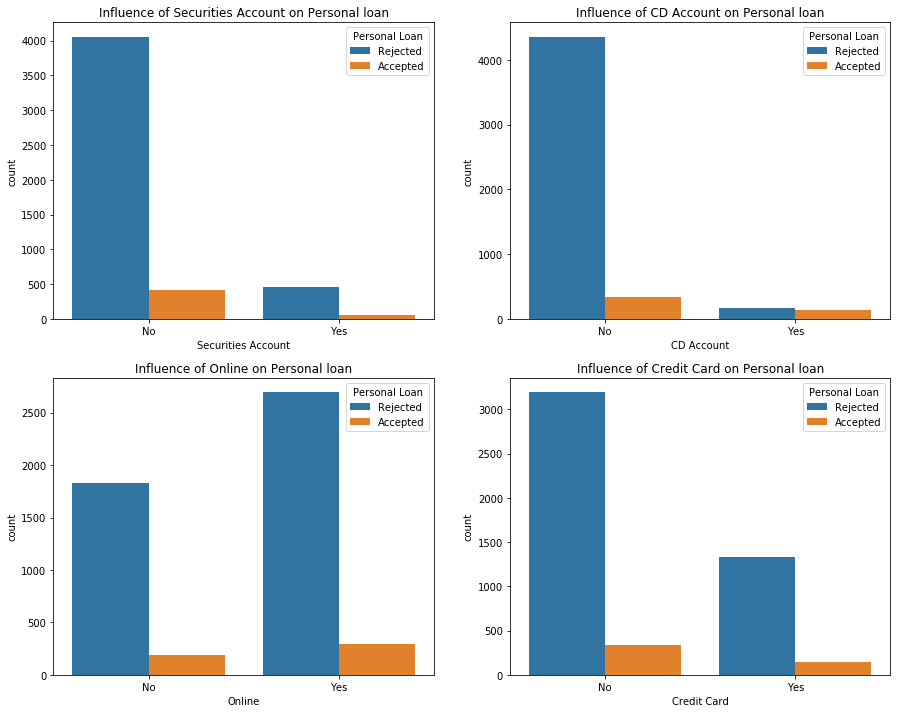

In [45]:
fig1 = plt.figure(figsize=(15,12))
fig1.add_subplot(2,2,1)
compFig1 = sns.countplot(x='Securities Account',data=bank_df,hue='personal_loan_target_col')
plt.title('Influence of Securities Account on Personal loan')
plt.xlabel('Securities Account')
leg = compFig1.axes.get_legend()
leg.set_title('Personal Loan')
new_labels = ['Rejected', 'Accepted']
for t, l in zip(leg.texts, new_labels): t.set_text(l)    
compFig1.set_xticklabels(["No","Yes"])

fig1.add_subplot(2,2,2)
compFig2 = sns.countplot(x='CD Account',data=bank_df,hue='personal_loan_target_col')
plt.title('Influence of CD Account on Personal loan')
plt.xlabel('CD Account')
leg = compFig2.axes.get_legend()
leg.set_title('Personal Loan')
new_labels = ['Rejected', 'Accepted']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
compFig2.set_xticklabels(["No","Yes"])

fig1.add_subplot(2,2,3)
compFig3 = sns.countplot(x='Online',data=bank_df,hue='personal_loan_target_col')
plt.title('Influence of Online on Personal loan')
plt.xlabel('Online')
leg = compFig3.axes.get_legend()
leg.set_title('Personal Loan')
new_labels = ['Rejected', 'Accepted']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
compFig3.set_xticklabels(["No","Yes"])
    
fig1.add_subplot(2,2,4)
compFig4 = sns.countplot(x='CreditCard',data=bank_df,hue='personal_loan_target_col')
plt.title('Influence of Credit Card on Personal loan')
plt.xlabel('Credit Card')
leg = compFig4.axes.get_legend()
leg.set_title('Personal Loan')
new_labels = ['Rejected', 'Accepted']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
compFig4.set_xticklabels(["No","Yes"])
    
plt.show()

<b> Comment: </b> Above graphs showing the influence on Personal Loan over `Security Account`, `CD Account`, `Online` and `CreditCard` column respectively.

* All over count of Rejecting a loan offer is more around `Security Account`, `CD Account`, `Online` and `CreditCard` columns.  
* Customers who doesn't have `Security Account` having more loan rejection.
* Customers who doesn't have `CD Account` having more loan rejection.
* Customers who does have `online` facility having more loan rejection and accepectance as well.
* Customers who doesn't have `Credit Card` having more loan rejection.

### Corelation checking

* Checking the corelation using pandas corr() function

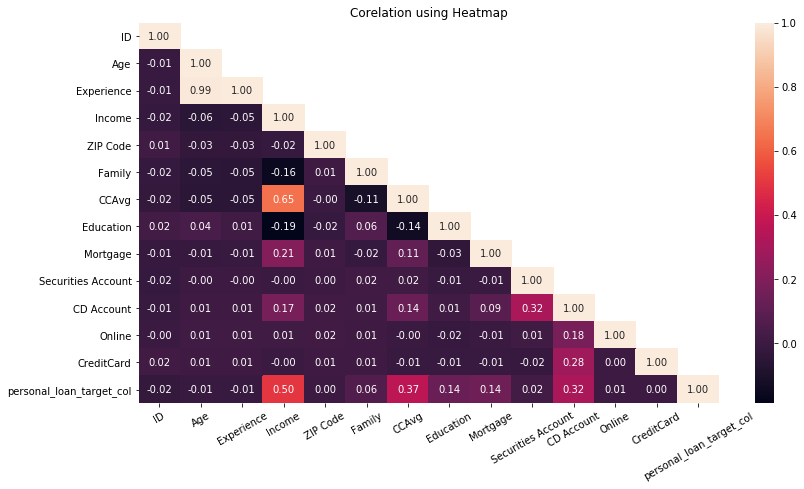

In [46]:
corr = bank_df.corr()
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
hmap = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=30)
plt.title('Corelation using Heatmap')
plt.show()

<b>Comment: </b> 

* `Age` and `Experience` is highly corelated with each oter.
* `CCAvg` and `Income` moderately corelated.

### Reducing dimension

* Dropping `ID`, `Experience`, `ZIP Code` column as we have enough evidence that `ID` and `ZIP Code` have no kind of relation with our target variable and `Experience` we are dropping to reduce the dimentionality as `Age` and `Experience` both attributes are positively corelated.

In [47]:
bank_df.drop(['ID','ZIP Code'], axis=1, inplace=True)
bank_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'personal_loan_target_col'],
      dtype='object')

<b>Comment :</b> I used drop() function with axis `1` and inplace `True` to completely remove the mentioned attributes column vise.

In [48]:
bank_data_without_exp_df = bank_df.drop(['Experience'], axis=1)
bank_data_without_exp_df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'personal_loan_target_col'],
      dtype='object')

<b>Comment :</b> I dropped `Experience` column and created another dataframe called `bank_data_without_exp_df` and kept the `bank_df` intact to use it further if required. 

We can see the new dataframe does not have the `Experience` column.

<hr>

## Model Building

<b>Train and Test data spliting</b>

* Data spliting without experience column

In [49]:
# Creating the independent data separate
X = bank_data_without_exp_df.drop('personal_loan_target_col', axis=1)
# Creating the dependent data separate

bank_data_without_exp_df['personal_loan_target_col'] = bank_data_without_exp_df['personal_loan_target_col'].astype('category')
y = bank_data_without_exp_df['personal_loan_target_col']

# data spliting using 70:30 train test data ratio and randon seeding 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

* Data spliting with experience column

In [50]:
# Creating the independent data separate
X_exp = bank_df.drop('personal_loan_target_col', axis=1)
# Creating the dependent data separate
y_exp = bank_df['personal_loan_target_col']

# data spliting using 70:30 train test data ratio and randon seeding 1
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_exp, test_size=0.30, random_state=1)

Used two dataframe for spliting. One is dataframe with experience column and another is without experience column. I want to check the impact and which dataframe creates better model for me. 

 * Without `Experience` column I have used `X_train, X_test, y_train, y_test` these splited variable.
 * With `Experience` column I have used `X_train_exp, X_test_exp, y_train_exp, y_test_exp` these splited variable.

In [51]:
# scale all the columns of the bank_df. This will produce a numpy array
X_train_scaled = preprocessing.scale(X_train_exp)
X_test_scaled = preprocessing.scale(X_test_exp)

/Users/soumalyab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/Users/soumalyab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


<hr>

## <center><u>:: Logistic Regression Model ::</u></center>

<b><u> > MODEL WITHOUT EXPERIENCE COLUMN</u></b>

In [52]:
# Calling Logistic function
logistic_model = LogisticRegression()
# Train and fitting our model
logistic_model.fit(X_train, y_train)

/Users/soumalyab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

* <b>Checking Model Score</b>

In [53]:
logistic_expected = y_test
# Prediction of model from test data
logistic_predicted = logistic_model.predict(X_test)

# Checking the score of the model
logistic_model_score = logistic_model.score(X_test, y_test)
print(f'Logistic Regression model scores : {round(logistic_model_score*100,2)}%')

Logistic Regression model scores : 94.27%


* <b>Evaluating Confusion Matrics</b>

In [54]:
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
logistic_confusion_metrics = metrics.confusion_matrix(logistic_expected, logistic_predicted)
print('CONFUSION MATRICS - Logistic Regression Model:')
print(logistic_confusion_metrics)

print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
logistic_matrics_accuracy = metrics.accuracy_score(logistic_expected, logistic_predicted)
print(f'Matrics Accuracy Score : {round(logistic_matrics_accuracy*100,2)}%') 

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
print(metrics.classification_report(logistic_expected, logistic_predicted))
print('-------------------------------------------------------------------')

-------------------------------------------------------------------
CONFUSION MATRICS - Logistic Regression Model:
[[1338   13]
 [  73   76]]
-------------------------------------------------------------------
Matrics Accuracy Score : 94.27%
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.51      0.64       149

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.90      0.75      0.80      1500
weighted avg       0.94      0.94      0.94      1500

-------------------------------------------------------------------


<b>Observation:</b> 

* Overall Accuracy score is : <b>94.27%</b>
* Toward <b>rejecting the loan offer</b> this model's score is quite high with <b>Precision: 95% , Recall: 99%, F1-SCORE: 97% </b>. 
* Towards <b>accepting the loan offer</b> the score is not really satisfing with <b>Precision: 85% , Recall: 51%, F1-SCORE: 64% </b>

<b>Weighted Avg F1-SCORE : 94%</b>

<hr/>

<b><u> > MODEL WITH EXPERIENCE COLUMN</u></b>

In [55]:
# Calling Logistic function
logistic_model_exp = LogisticRegression()
# Train and fitting our model
logistic_model_exp.fit(X_train_exp, y_train_exp)

/Users/soumalyab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

* <b>Checking Model Score</b>

In [56]:
logistic_expected_exp = y_test_exp
# Prediction of model from test data
logistic_predicted_exp = logistic_model_exp.predict(X_test_exp)

# Checking the score of the model
logistic_model_score_exp = logistic_model_exp.score(X_test_exp, y_test_exp)
print(f'Logistic Regression model scores with Experience column : {round(logistic_model_score_exp*100,2)}%')

Logistic Regression model scores with Experience column : 94.6%


* <b>Evaluating Confusion Matrics</b>

In [57]:
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
logistic_confusion_metrics_exp = metrics.confusion_matrix(logistic_expected_exp, logistic_predicted_exp)
print('CONFUSION METRICS : Logistic Regression model(With Experience column):')
print(logistic_confusion_metrics_exp)

print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
logistic_matrics_accuracy_exp = metrics.accuracy_score(logistic_expected_exp, logistic_predicted_exp)
print(f'Matrics Accuracy Score : {round(logistic_matrics_accuracy_exp*100,2)}%') 

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
print(metrics.classification_report(logistic_expected_exp, logistic_predicted_exp))
print('-------------------------------------------------------------------')

-------------------------------------------------------------------
CONFUSION METRICS : Logistic Regression model(With Experience column):
[[1335   16]
 [  65   84]]
-------------------------------------------------------------------
Matrics Accuracy Score : 94.6%
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.84      0.56      0.67       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500

-------------------------------------------------------------------


<b>Observation:</b> 

With Experience column our Model score actually imporved slight.

* Overall Accuracy score is : <b>94.6%</b>
* Toward <b>rejecting the loan offer</b> this model's score is quite high with <b>Precision: 95% , Recall: 99%, F1-SCORE: 97% </b>. 
* Towards <b>accepting the loan offer</b> the score is not really satisfing with <b>Precision: 84% , Recall: 56%, F1-SCORE: 67% </b>

<b>Weighted Avg F1-SCORE : 94%</b>

Let's see if we can improve our model more with scaled data.

<hr/>

<b><u> > MODEL WITH EXPERIENCE COLUMN AND DATA SCALING</u></b>

In [58]:
# scaled
logistic_model_scaled = LogisticRegression()
logistic_model_scaled.fit(X_train_scaled, y_train_exp)

/Users/soumalyab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

* <b>Checking Model Score</b>

In [59]:
logistic_expected_scaled = y_test_exp
# Prediction of model from test data
logistic_predicted_scaled = logistic_model_scaled.predict(X_test_scaled)

# Checking the score of the model
logistic_model_score_scaled = logistic_model_scaled.score(X_test_scaled, y_test_exp)
print(f'Logistic Regression model scores with scaled data: {round(logistic_model_score_scaled*100,2)}%')

Logistic Regression model scores with scaled data: 94.73%


* <b>Evaluating Confusion Matrics</b>

In [60]:
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
logistic_confusion_metrics_scaled = metrics.confusion_matrix(logistic_expected_scaled, logistic_predicted_scaled)
print('CONFUSION METRICS - Logistic Regression model (SCALED DATA):')
print(logistic_confusion_metrics_scaled)

print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
logistic_matrics_accuracy_scaled = metrics.accuracy_score(logistic_expected_scaled, logistic_predicted_scaled)
print(f'Matrics Accuracy Score : {round(logistic_matrics_accuracy_scaled*100,2)}%') 

print('-------------------------------------------------------------------')


# Using classification report function for check the recall, precision and f score
print('Report : ')
print(metrics.classification_report(logistic_expected_scaled, logistic_predicted_scaled))
print('-------------------------------------------------------------------')

-------------------------------------------------------------------
CONFUSION METRICS - Logistic Regression model (SCALED DATA):
[[1333   18]
 [  61   88]]
-------------------------------------------------------------------
Matrics Accuracy Score : 94.73%
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.83      0.59      0.69       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

-------------------------------------------------------------------


<b>Observation:</b> 

With scaled data our Model score more imporved now.

* Overall Accuracy score is : <b>94.73%</b>
* Toward <b>rejecting the loan offer</b> this model's score is quite high with <b>Precision: 96% , Recall: 99%, F1-SCORE: 97% </b>. 
* Towards <b>accepting the loan offer</b> the score is not really satisfing with <b>Precision: 83% , Recall: 59%, F1-SCORE: 69% </b>

<b>Weighted Avg F1-SCORE : 94%</b>

<hr>

## <center><u>:: Naive-Bayes Model ::</u></center>

<b><u> > MODEL WITHOUT EXPERIENCE COLUMN</u></b>

In [61]:
# Using GaussianNB function to build this model
nb_model = GaussianNB()
# Train and fitting our model
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

* <b>Checking Model Score</b>

In [62]:
nb_expected = y_test
# Prediction of model from test data
nb_predicted = nb_model.predict(X_test)

nb_model_score = nb_model.score(X_test, y_test)
print(f'Naive Bayes model scores : {round(nb_model_score*100,2)}%')

Naive Bayes model scores : 87.47%


* <b>Evaluating Confusion Metrics</b>

In [63]:
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
nb_confusion_metrics = metrics.confusion_matrix(nb_expected, nb_predicted)
print('CONFUSION METRICS - Naive-Bayes Model:')
print(nb_confusion_metrics)
print('-------------------------------------------------------------------')

# Using accuracy score function for accuracy meacsurements
nb_matrics_accuracy = metrics.accuracy_score(nb_expected,nb_predicted)
print(f'Accuracy Score : {round(nb_matrics_accuracy*100,2)}%') 

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
print(metrics.classification_report(nb_expected, nb_predicted))
print('-------------------------------------------------------------------')

-------------------------------------------------------------------
CONFUSION METRICS - Naive-Bayes Model:
[[1227  124]
 [  64   85]]
-------------------------------------------------------------------
Accuracy Score : 87.47%
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.47       149

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500

-------------------------------------------------------------------


<b>Observation:</b> 

* Overall Accuracy score is : <b>87.47%</b>
* Toward <b>rejecting the loan offer</b> this model's score is quite high with <b>Precision: 95% , Recall: 91%, F1-SCORE: 93% </b>. 
* Towards <b>accepting the loan offer</b> the score is not really satisfing with <b>Precision: 41% , Recall: 57%, F1-SCORE: 47% </b>

<b>Weighted Avg F1-SCORE: 88%</b>

<hr/>

<b><u> > MODEL WITH EXPERIENCE COLUMN</u></b>

In [64]:
# Using GaussianNB function to build this model
nb_model_exp = GaussianNB()
# Train and fitting our model
nb_model_exp.fit(X_train_exp, y_train_exp)

GaussianNB(priors=None, var_smoothing=1e-09)

* <b>Checking Model Score</b>

In [65]:
nb_expected_exp = y_test_exp
# Prediction of model from test data
nb_predicted_exp = nb_model_exp.predict(X_test_exp)

nb_model_score_exp = nb_model_exp.score(X_test_exp, y_test_exp)
print(f'Naive Bayes model scores : {round(nb_model_score_exp*100,2)}%')

Naive Bayes model scores : 87.47%


* <b>Evaluating Confusion Matrics</b>

In [66]:
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
nb_confusion_metrics_exp = metrics.confusion_matrix(nb_expected_exp, nb_predicted_exp)
print('CONFUSION METRICS - Naive-Bayes Model (WITH EXPERIENCE COLUMN):')
print(nb_confusion_metrics_exp)

print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy meacsurements
nb_matrics_accuracy_exp = metrics.accuracy_score(nb_expected_exp,nb_predicted_exp)
print(f'Accuracy Score : {round(nb_matrics_accuracy_exp*100,2)}%') 

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
print(metrics.classification_report(nb_expected_exp, nb_predicted_exp))
print('-------------------------------------------------------------------')

-------------------------------------------------------------------
CONFUSION METRICS - Naive-Bayes Model (WITH EXPERIENCE COLUMN):
[[1228  123]
 [  65   84]]
-------------------------------------------------------------------
Accuracy Score : 87.47%
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.47       149

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500

-------------------------------------------------------------------


<b>Observation:</b> 

With Experience column our NB Model score didn't changed at all.


* Overall Accuracy score is : <b>87.47%</b>
* Toward <b>rejecting the loan offer</b> this model's score is quite high with <b>Precision: 95% , Recall: 91%, F1-SCORE: 93% </b>. 
* Towards <b>accepting the loan offer</b> the score is not really satisfing with <b>Precision: 41% , Recall: 56%, F1-SCORE: 47% </b>

<b>Weighted Avg F1-SCORE: 88%</b>

Let's check if we can improve the score after data scaling

<hr/>

<b><u> > MODEL WITH EXPERIENCE COLUMN AND DATA SCALING</u></b>

In [67]:
# scaled
nb_model_scaled = GaussianNB()
nb_model_scaled.fit(X_train_scaled, y_train_exp)

GaussianNB(priors=None, var_smoothing=1e-09)

* <b>Checking Model Score</b>

In [68]:
nb_expected_scaled = y_test_exp
# Prediction of model from test data
nb_predicted_scaled = nb_model_scaled.predict(X_test_scaled)

# Checking the score of the model
nb_model_score_scaled = nb_model_scaled.score(X_test_scaled, y_test_exp)
print(f'Naive-Bayes model scores with scaled data: {round(nb_model_score_scaled*100,2)}%')

Naive-Bayes model scores with scaled data: 87.13%


* <b>Evaluating Confusion Matrics</b>

In [69]:
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
nb_confusion_metrics_scaled = metrics.confusion_matrix(nb_expected_scaled, nb_predicted_scaled)
print('CONFUSION METRICS - Naive-Bayes Model (SCALED DATA):')
print(nb_confusion_metrics_scaled)

print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy meacsurements
nb_matrics_accuracy_scaled = metrics.accuracy_score(nb_expected_scaled,nb_predicted_scaled)
print(f'Accuracy Score : {round(nb_matrics_accuracy_scaled*100,2)}%') 

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
print(metrics.classification_report(nb_expected_scaled, nb_predicted_scaled))
print('-------------------------------------------------------------------')

-------------------------------------------------------------------
CONFUSION METRICS - Naive-Bayes Model (SCALED DATA):
[[1223  128]
 [  65   84]]
-------------------------------------------------------------------
Accuracy Score : 87.13%
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.40      0.56      0.47       149

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.67      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500

-------------------------------------------------------------------


<b>Observation:</b> 

With scaled data our Model score fall down.

* Overall Accuracy score is : <b>87.13%</b>
* Toward <b>rejecting the loan offer</b> this model's score is quite high with <b>Precision: 95% , Recall: 91%, F1-SCORE: 93% </b>. 
* Towards <b>accepting the loan offer</b> the score is not really satisfing with <b>Precision: 40% , Recall: 56%, F1-SCORE: 47% </b>

<b>Weighted Svg F1-SCORE: 88%</b>

<hr>

## <center><u>:: KNN (K Nearest Neighbour) Model ::</u></center>

<b><u> > MODEL WITHOUT EXPERIENCE COLUMN</u></b>

* <b>Determining Optimal number of K</b>

In [70]:
# creating odd list of K for KNN
KList = list(range(1,20))
# subsetting just the odd ones
K_neighbors = list(filter(lambda x: x % 2 != 0, KList))
# empty list that will hold accuracy scores
ac_scores_k = []
# perform accuracy metrics for values from 1,3,5....19
for k in K_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k , weights = 'uniform', metric='euclidean')
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = metrics.accuracy_score(y_test, y_pred)
    ac_scores_k.append(scores)
# changing to misclassification error
MSE = [1 - x for x in ac_scores_k]
# determining best k
optimal_k = K_neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


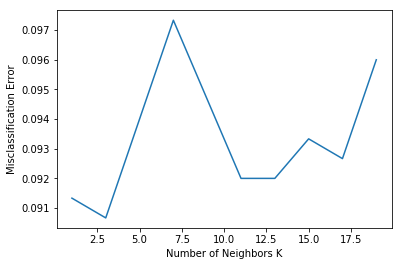

In [71]:
# plot misclassification error vs k
plt.plot(K_neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

<b>Comment: </b> Above graph is showing the misclassification which detemining the optimal K value. At k=3 we got the minimum error.

In [72]:
# Using KNeighborsClassifier function to build this model

# Using optimal K value
knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
# Train and fitting our model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

* <b>Checking Model Score</b>

In [73]:
knn_expected = y_test

# Prediction of model from test data
knn_predicted = knn_model.predict(X_test)

# Checking the score of the model
knn_model_score = knn_model.score(X_test, y_test)
print(f'KNN model scores : {round(knn_model_score*100,2)}%')

KNN model scores : 90.93%


* <b>Evaluating Confusion Matrics</b>

In [74]:
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
knn_confusion_metrics = metrics.confusion_matrix(knn_expected, knn_predicted)
print('CONFUSION METRICS - KNN Model:')
print(knn_confusion_metrics)

print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
knn_matrics_accuracy = metrics.accuracy_score(knn_expected,knn_predicted)
print(f'Accuracy Score : {round(knn_matrics_accuracy*100,2)}%') 

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
print(metrics.classification_report(knn_expected, knn_predicted))
print('-------------------------------------------------------------------')

-------------------------------------------------------------------
CONFUSION METRICS - KNN Model:
[[1304   47]
 [  89   60]]
-------------------------------------------------------------------
Accuracy Score : 90.93%
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1351
           1       0.56      0.40      0.47       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.75      0.68      0.71      1500
weighted avg       0.90      0.91      0.90      1500

-------------------------------------------------------------------


<b>Observation:</b> 

* Overall Accuracy score is : <b>90.93%</b>
* Toward <b>rejecting the loan offer</b> this model's score is quite high with <b>Precision: 94% , Recall: 97%, F1-SCORE: 95% </b>. 
* Towards <b>accepting the loan offer</b> the score is not really satisfing with <b>Precision: 56% , Recall: 40%, F1-SCORE: 47% </b>

<b>Weighted Avg F1-SCORE : 90%</b>

<hr/>

<b><u> > MODEL WITH EXPERIENCE COLUMN</u></b>

In [75]:
# Using KNeighborsClassifier function to build this model

# Using optimal K value
knn_model_exp = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
# Train and fitting our model
knn_model_exp.fit(X_train_exp, y_train_exp)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

* <b>Checking Model Score</b>

In [76]:
knn_expected_exp = y_test_exp

# Prediction of model from test data
knn_predicted_exp = knn_model_exp.predict(X_test_exp)

# Checking the score of the model
knn_model_score_exp = knn_model_exp.score(X_test_exp, y_test_exp)
print(f'KNN model scores : {round(knn_model_score_exp*100,2)}%')

KNN model scores : 90.4%


* <b>Evaluating Confusion Matrics</b>

In [77]:
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
knn_confusion_metrics_exp = metrics.confusion_matrix(knn_expected_exp, knn_predicted_exp)
print('CONFUSION METRICS - KNN Model (WITH EXPERIENCE DATA):')
print(knn_confusion_metrics_exp)

print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
knn_matrics_accuracy_exp = metrics.accuracy_score(knn_expected_exp,knn_predicted_exp)
print(f'Accuracy Score : {round(knn_matrics_accuracy_exp*100,2)}%') 


print('-------------------------------------------------------------------')
# Using classification report function for check the recall, precision and f score
print('Report : ')
print(metrics.classification_report(knn_expected_exp, knn_predicted_exp))
print('-------------------------------------------------------------------')

-------------------------------------------------------------------
CONFUSION METRICS - KNN Model (WITH EXPERIENCE DATA):
[[1301   50]
 [  94   55]]
-------------------------------------------------------------------
Accuracy Score : 90.4%
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1351
           1       0.52      0.37      0.43       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.73      0.67      0.69      1500
weighted avg       0.89      0.90      0.90      1500

-------------------------------------------------------------------


<b>Observation:</b> 

With Experience column our KNN Model score dropped in some fraction.


* Overall Accuracy score is : <b>90.4%</b>
* Toward <b>rejecting the loan offer</b> this model's score is quite high with <b>Precision: 93% , Recall: 96%, F1-SCORE: 95% </b>. 
* Towards <b>accepting the loan offer</b> the score is not really satisfing with <b>Precision: 52% , Recall: 37%, F1-SCORE: 43% </b>

<b>Weighted Avg F1-SCORE: 90%</b>

Let's check if we can improve the score after data scaling

<hr/>

<b><u> > MODEL WITH EXPERIENCE COLUMN AND DATA SCALING</u></b>

In [83]:
# scale all the columns of the bank_df. This will produce a numpy array

# Applying Without experience comlumn for scaling as it came with better model score.
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

# scaled
knn_model_scaled = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model_scaled.fit(X_train_scaled, y_train)

/Users/soumalyab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/Users/soumalyab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

* <b>Checking Model Score</b>

In [79]:
knn_expected_scaled = y_test
# Prediction of model from test data
knn_predicted_scaled = knn_model_scaled.predict(X_test_scaled)

# Checking the score of the model
knn_model_score_scaled = knn_model_scaled.score(X_test_scaled, y_test)
print(f'KNN model scores with scaled data: {round(knn_model_score_scaled*100,2)}%')

KNN model scores with scaled data: 95.87%


* <b>Evaluating Confusion Matrics</b>

In [80]:
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
knn_confusion_metrics_scaled = metrics.confusion_matrix(knn_expected_scaled, knn_predicted_scaled)
print('CONFUSION METRICS - KNN Model (SCALED DATA):')
print(knn_confusion_metrics_scaled)

print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy meacsurements
knn_matrics_accuracy_scaled = metrics.accuracy_score(knn_expected_scaled,knn_predicted_scaled)
print(f'Accuracy Score : {round(knn_matrics_accuracy_scaled*100,2)}%') 

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
print(metrics.classification_report(knn_expected_scaled, knn_predicted_scaled))
print('-------------------------------------------------------------------')

-------------------------------------------------------------------
CONFUSION METRICS - KNN Model (SCALED DATA):
[[1341   10]
 [  52   97]]
-------------------------------------------------------------------
Accuracy Score : 95.87%
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.91      0.65      0.76       149

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500

-------------------------------------------------------------------


<b>Observation:</b> 

With Experience column our KNN Model score improved very well.


* Overall Accuracy score is : <b>95.87%</b>
* Toward <b>rejecting the loan offer</b> this model's score is quite high with <b>Precision: 96% , Recall: 99%, F1-SCORE: 98% </b>. 
* Towards <b>accepting the loan offer</b> the score is not really satisfing with <b>Precision: 90% , Recall: 62%, F1-SCORE: 76% </b>

<b>Weighted Avg F1-SCORE: 96%</b>

<hr>

### <center>:: Conclusion ::</center>

Below is the comparision between the model scores and weighted avg  

<table width='100%'>
    <tr>
        <th>Model</th>
        <th>Accuracy</th>
        <th>F1-SCORE (Weighted Avg)</th>
    </tr>
    <tr>
        <td>Logistic Regression Model</td>
        <td>94.73%</td>
        <td>94%</td>
    </tr>
    <tr>
        <td>Naive-Bayes Model</td>
        <td>87.13%</td>
        <td>88%</td>
    </tr>
    <tr>
        <td><b>KNN Model</b></td>
        <td><b>95.87%</b></td>
        <td><b>96%</b></td>
    </tr>
</table>


I can see that the KNN model is the best model among the three models we are evaluating which is `Logistic Model`, `Naive-Bayes Model` and `KNN Model`. It has the `Accuracy Score : 95.87%` and `Weighted Avg : 96%` .



#### Checking the AUC (Area Under Curve) value:

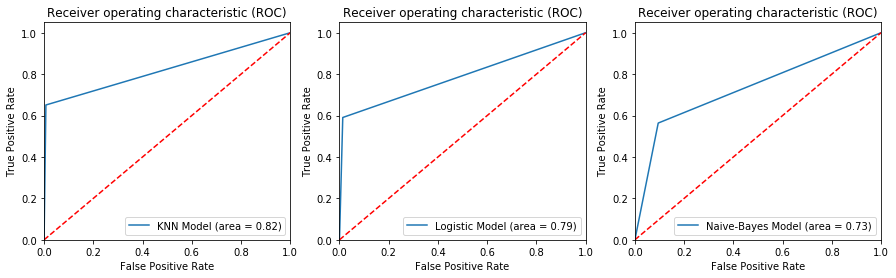

In [81]:
knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(knn_expected_scaled, knn_predicted_scaled)
knn_roc_auc = metrics.roc_auc_score(knn_expected_scaled, knn_predicted_scaled)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(1,3,1)
plt.plot(knn_fpr, knn_tpr, label='KNN Model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")


logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(logistic_expected_scaled, logistic_predicted_scaled)
logistic_roc_auc = metrics.roc_auc_score(logistic_expected_scaled, logistic_predicted_scaled)
fig1_graph.add_subplot(1,3,2)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(nb_expected_scaled, nb_predicted_scaled)
nb_roc_auc = metrics.roc_auc_score(nb_expected_scaled, nb_predicted_scaled)
fig1_graph.add_subplot(1,3,3)
plt.plot(nb_fpr, nb_tpr, label='Naive-Bayes Model (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

From the above graph and evaluation also I found the AUC value for KNN Model is better that other model.

* <b>KNN Model AUC Value  : 0.82</b>
* <b>Logistic Regression Model AUC Value  : 0.79</b>
* <b>Naive-Bayes Model AUC Value  : 0.73</b>

Lets evaluate the KNN Model Confusion Matrics Once Again

In [82]:
print(knn_confusion_metrics_scaled)

[[1341   10]
 [  52   97]]


As our classification goal is to predict the likelihood of a liability customer buying personal loans. So after analysing the cufution matrics, I see the facts below :

<b>True Positives (TP):</b> we correctly predicted that customer accepted the loan <b>97</b>

<b>True Negatives (TN):</b> we correctly predicted that customer rejected the loan <b>1341</b>

<b>False Positives (FP):</b> we incorrectly predicted that customer accepted the loan (a "Type I error") <b>10</b>. Falsely predict positive is <b>Type I error</b>


<b>False Negatives (FN):</b> we incorrectly predicted that customer rejected the loan (a "Type II error") <b>52</b>. Falsely predict negative is <b>Type II error</b>


Towards accepting the loan by a customer, our model's correct prediction is the higest among other model. Though it's very less amount and the main reason for that is we have unbalanaced target variables. The ratio is approx 10% who brought the loan and 90% who didn't brought the loan.

Keeping this factor in mind, our model still scored `95.87%` by maintaining the ratio.



### <b>So, I can say we can go with the KNN MODEL and it will perform better in production.</b>

<hr/>

### <u>Some other solutions:</u>

* However I would like to mention that we can check for <b>Decision Tree</b>, <b>Random Forest</b> etc. this type of Ensembled Techniques for this dataset to get better predictive model.

* Also we can ask for more data point to reduce the unbalanced situation.

### <center>============================ X ============================</center>